In [1]:
import pandas as pd

final_db = pd.read_excel('Final formated DB.xlsx')
final_db = final_db.loc[final_db['Exclusion'] == 'No']
final_db = final_db.loc[final_db['Time point'] == 'M0']
final_db = final_db.set_index('Patient ID')

In [2]:
# Just to have everything at disposition to tweak if needed.
glucose_db = final_db.loc[final_db['Change of Insuline medication'] == 'NO']
cpept_db = glucose_db.loc[glucose_db['OGTT C peptide'] == 'Yes']
glu_db = glucose_db.loc[glucose_db['OGTT Glucose'] == 'Yes']
ins_db = glucose_db.loc[glucose_db['OGTT Insuline'] == 'Yes']

# Index correlations

In [3]:
# Some lists to make it easy to manipulate
Ins_indexes = ['AUC Insuline', 'AUC Glucose', 'AUC C peptide', 'Average Fasting Glucose',
               'Average Fasting Insulin', 'Average Fasting C peptide', 'HOMA ISI', 'Matsuda index',
               'Stumvoll First Phase', 'Stumvoll Second Phase', 'HOMA IR',
               'OGIS','IGI 30', 'IGI Cpept', 'CPRI', 'PCPRI','Trapezoid AUC Insuline', 'Trapezoid AUC C peptide',
               'Trapezoid AUC Glucose','Corrected AUC Insuline',
               'Corrected AUC Glucose']
sec_indices = ['AUC Insuline','AUC C peptide',
              'Average Fasting Insulin', 'Average Fasting C peptide',
              'Stumvoll First Phase', 'Stumvoll Second Phase',
              'IGI 30', 'IGI Cpept', 'CPRI', 'PCPRI']
sensitivity_indices = ['AUC Glucose', 'Average Fasting Glucose',
                       'HOMA ISI', 'Matsuda index', 'OGIS']
fasting_indices = ['Average Fasting Insulin','Average Fasting C peptide', 'Average Fasting Glucose',
                   'CPRI','HOMA ISI','HOMA IR']

OGTT_ins = ['AUC Insuline','Matsuda index','Stumvoll First Phase','Stumvoll Second Phase','OGIS','IGI 30'
           'Trapezoid AUC Insuline','Corrected AUC Insuline']
OGTT_cpept = ['AUC C peptide','IGI Cpept', 'PCPRI','Trapezoid AUC C peptide']
OGTT_glu = ['AUC Glucose','Corrected AUC Glucose']


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(ins_db[Ins_indexes], figsize=(13,10))
plt.show()

<Figure size 1300x1000 with 441 Axes>

We have way too much comparaisons to look at them all one by one.

We want to find the best couples of index that illustrate the "hyperbolic relationship" between secretion of insulin and sensitivity

# Log(x) against y  r² approach

We calculate the r² the same manner Excel would do for logarythmic tendancy curve

For example for Matsuda against stumvoll:

C:\Users\Daph\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


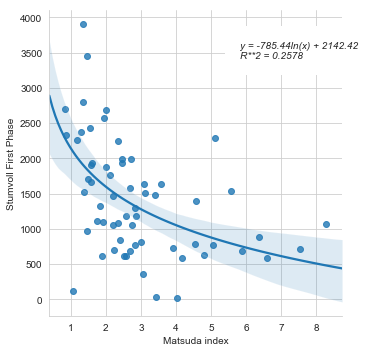

In [4]:
from analysis_script import correl_graph

correl_graph(ins_db, 'Matsuda index', 'Stumvoll First Phase')
plt.show()

We calculate here all those r-squared values for our desired variables

In [5]:
import scipy.stats
import numpy as np

def calculate_r_square_log_x(df, x, y):
    df = df[[x,y]].dropna()
    slope, intercept, r_value, d, e = scipy.stats.linregress(np.log(df[x]), df[y])
    return r_value**2

def log_r_square_df(df):
    r_df = pd.DataFrame(columns = df.columns, index= df.columns)
    for a in df.columns:
        for b in df.columns:
            if a == b: 
                r_df.loc[[a],[b]] = 1
            else:
                r_df.loc[[a],[b]] = calculate_r_square_log_x(df, a, b)
            
    return r_df

rsquare_df = log_r_square_df(ins_db[Ins_indexes])

We're not very interested to compare indices of the same "type" against each other but more to compare secretion against sensitivity. Let's clean our table: 

In [6]:
rsquare_df.drop(index = sec_indices, inplace = True)
rsquare_df.drop(columns = sensitivity_indices, inplace = True)

# Table of R-square
rsquare_df

,AUC Insuline,AUC C peptide,Average Fasting Insulin,Average Fasting C peptide,Stumvoll First Phase,Stumvoll Second Phase,HOMA IR,IGI 30,IGI Cpept,CPRI,PCPRI,Trapezoid AUC Insuline,Trapezoid AUC C peptide,Trapezoid AUC Glucose,Corrected AUC Insuline,Corrected AUC Glucose
AUC Glucose,0.0239595,0.00603264,0.0143691,0.0302967,0.116405,0.0905155,0.0495611,0.224189,0.351821,0.00204812,0.0569804,0.0222676,0.00285077,0.932934,0.0194589,0.932934
Average Fasting Glucose,0.0261497,0.0580752,0.190157,0.0464538,0.123894,0.0993243,0.424531,0.113337,0.187611,0.0203489,0.0745131,0.0230515,0.0452687,0.381015,0.0210548,0.381015
HOMA ISI,0.368708,0.00648124,0.869569,0.360802,0.1897,0.212761,0.696949,0.027058,0.0444929,0.227965,5.02673e-05,0.363711,0.0123691,0.0597439,0.358683,0.0597439
Matsuda index,0.599299,0.0629211,0.672861,0.323713,0.257835,0.2908,0.653807,0.0368279,0.057113,0.227182,0.017233,0.591571,0.0907496,0.143883,0.591516,0.143883
HOMA IR,0.368708,0.00648124,0.869569,0.360802,0.1897,0.212761,1,0.027058,0.0444929,0.227965,5.02673e-05,0.363711,0.0123691,0.0597439,0.358683,0.0597439
OGIS,0.357927,0.039208,0.202892,0.213577,0.00623012,0.0121801,0.271961,0.00473018,0.0790912,0.0664625,0.0184654,0.356655,0.0606581,0.283397,0.337662,0.283397
Trapezoid AUC Insuline,0.910816,0.256022,0.355272,0.150642,0.492369,0.516968,0.238526,0.203921,0.00211072,0.195906,0.222253,1,0.314232,0.00893833,0.913805,0.00893833
Trapezoid AUC C peptide,0.15065,0.664874,0.0111185,0.151952,0.0845712,0.0877538,0.00359968,0.0556748,0.21484,0.198338,0.630206,0.152192,1,0.00992493,0.150862,0.00992493
Trapezoid AUC Glucose,0.0226047,0.0054895,0.0135907,0.0355408,0.113281,0.0858327,0.0492153,0.240307,0.405197,0.00138577,0.0569804,0.0210171,0.00230631,1,0.0198065,0.981634
Corrected AUC Insuline,0.905096,0.248404,0.352827,0.145258,0.507862,0.532885,0.235612,0.207565,0.0017025,0.190512,0.219468,0.913578,0.306394,0.00765075,1,0.00765075


# Here we have a heatmap of R-squared value for a log relationship. 
It's centered around 0.2

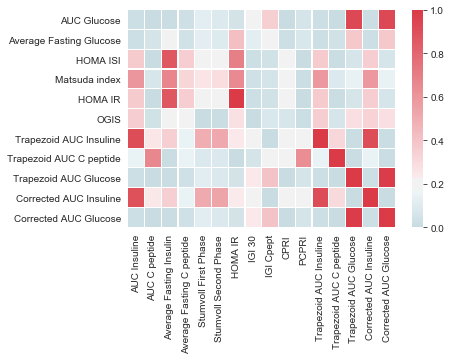

In [7]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(rsquare_df.values.tolist(), yticklabels=rsquare_df.index, xticklabels=rsquare_df.columns, 
            vmin=0, vmax=1, center=0.2, cmap=cmap, linewidths=.1)
plt.show()

# Spearman correlation

Spearman have for advantage to be able to capture logarythmic relationships

Take this example (taken from https://blog.bigml.com/2015/09/21/looking-for-connections-in-your-data-correlation-coefficients/)

With p being pearson and s being spearman correlation coefficient (not squared)

![ascombe quartet](image/anscombe.png)

In [8]:
from analysis_script import spearman_p_value_DataFrame
spearman_p_value, corrspearman = spearman_p_value_DataFrame(ins_db[Ins_indexes])

In [9]:
corrspearman.drop(index = sec_indices, inplace = True)
corrspearman.drop(columns = sensitivity_indices, inplace = True)

In [10]:
corrspearman

,AUC Insuline,AUC C peptide,Average Fasting Insulin,Average Fasting C peptide,Stumvoll First Phase,Stumvoll Second Phase,HOMA IR,IGI 30,IGI Cpept,CPRI,PCPRI,Trapezoid AUC Insuline,Trapezoid AUC C peptide,Trapezoid AUC Glucose,Corrected AUC Insuline,Corrected AUC Glucose
AUC Glucose,0.197008,0.0427452,0.16838,0.195479,-0.154503,-0.126225,0.324588,-0.30444,-0.346376,0.092418,-0.128017,0.189534,0.0577148,0.977403,0.181143,0.977393
Average Fasting Glucose,-0.130488,-0.227377,0.164723,0.19417,-0.220993,-0.208926,0.393586,-0.247139,-0.347743,-0.0311301,-0.196421,-0.135123,-0.206718,0.55978,-0.140501,0.559096
HOMA ISI,-0.618969,-0.271241,-0.969318,-0.64965,-0.410927,-0.427316,-0.909091,-0.199956,0.0888549,-0.473951,-0.0517045,-0.612325,-0.295192,-0.248014,-0.612762,-0.248121
Matsuda index,-0.646897,-0.259309,-0.795367,-0.492308,-0.323864,-0.343837,-0.725262,-0.0966783,0.16049,-0.348164,-0.0355769,-0.650699,-0.29458,-0.243075,-0.652098,-0.243269
HOMA IR,0.579196,0.245673,0.926705,0.6184,0.501836,0.518226,1,0.290865,-0.000786713,0.559178,0.136932,0.572552,0.272465,0.336083,0.570149,0.336189
OGIS,-0.312893,-0.0438811,-0.37264,-0.326923,0.146897,0.129283,-0.385664,0.273427,0.345586,-0.0729895,0.170017,-0.315122,-0.0673077,-0.42577,-0.316871,-0.425568
Trapezoid AUC Insuline,0.998864,0.593444,0.671547,0.41451,0.70507,0.717483,0.572552,0.553759,0.186233,0.453016,0.430857,1,0.63715,0.186519,0.997727,0.18715
Trapezoid AUC C peptide,0.635708,0.967308,0.3434,0.632561,0.443138,0.445586,0.272465,0.377928,0.46604,0.67583,0.709047,0.63715,1,0.0905823,0.627579,0.0907343
Trapezoid AUC Glucose,0.193555,0.0746512,0.176248,0.213704,-0.151837,-0.121898,0.336083,-0.309859,-0.371945,0.107715,-0.0752194,0.186519,0.0905823,1,0.179176,0.999989
Corrected AUC Insuline,0.996591,0.583741,0.670717,0.405288,0.7066,0.718969,0.570149,0.553628,0.181031,0.441521,0.427142,0.997727,0.627579,0.179176,1,0.179808


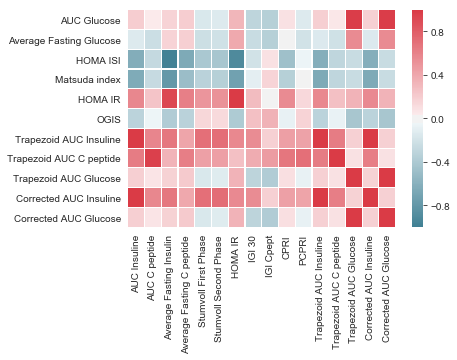

In [11]:
import seaborn as sns
sns.heatmap(corrspearman.values.tolist(), yticklabels=corrspearman.index, xticklabels=corrspearman.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1)
plt.show()

C:\Users\Daph\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


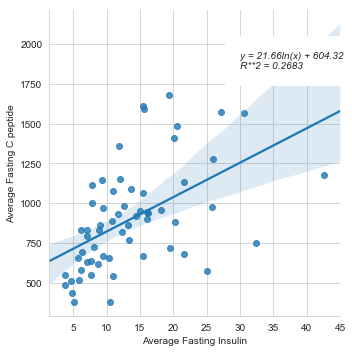

In [12]:
def lineareg(df, x, y):
    df = df[[x,y]].dropna()
    slope, intercept, r_value, d, e = scipy.stats.linregress(df[x], df[y])
    sns.lmplot(x=x, y=y, data=df)
    legend = 'y = '+str(round(slope,2))+'ln(x) + '+str(round(intercept, 2))+'\n'+'R**2 = '+str(round(r_value**2,4))
    x_box_coor = plt.gca().get_xlim()[1] - plt.gca().get_xlim()[1]/3
    y_box_coor = plt.gca().get_ylim()[1] - plt.gca().get_ylim()[1] / 6
    plt.gca().text(x_box_coor, y_box_coor, legend, style='italic',
            bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10, 'lw':10})

lineareg(ins_db, 'Average Fasting Insulin', 'Average Fasting C peptide')
plt.show()

In [21]:
# I want to do correlation with the maximum of data possible.
import scipy.stats
lists = [Ins_indexes,OGTT_ins, OGTT_cpept, OGTT_glu]

def get_good_datas(lists, a):
    if a in lists[1]:
        return ins_db[a]
    elif a in lists[2]:
        return cpept_db[a]
    else:
        return glu_db[a]
    
def correlator(df, lists, corr='spearman'):
    p_value_df = pd.DataFrame(columns = df.columns, index= df.columns)
    corrdf = pd.DataFrame(columns = df.columns, index= df.columns)
    
    big_list = lists[0]
    for a in big_list:
        for b in big_list:
            if a == b:
                p_value_df.loc[[a], [b]] = 1
                corrdf.loc[[a], [b]] = 1
            else:
                dummy_df = pd.concat([get_good_datas(lists, a),get_good_datas(lists, b)], axis=1,sort=False).dropna()
                _thearray = np.column_stack((dummy_df[a].tolist(), dummy_df[b].tolist()))
                r, p = stats.spearmanr(_thearray)
                p_value_df.loc[[a], [b]] = p
                corrdf.loc[[a], [b]] = r
    return p_value_df, corrfd

blih, bluh = correlator(final_db, lists)

NameError: name 'stats' is not defined